# Comparison between efficiencies of two different methods to get the eigenvalues of $M$

In [17]:
from Majorana import get_Majorana_spectrum, decompose_skew_schur, H_fermionic_skew

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

In [3]:
Jx = 1.75
Jy = 0.25
Jz = 1.0
N = 20
D_list = [1 for i in range(2*N)]
bc = 'periodic'
SigmaY = 1

In [4]:
repeat = 1000

for method in ['iM', 'M2']:
    begin = time()
    
    for rep in range(repeat):
        get_Majorana_spectrum(Jx, Jy, Jz, N, SigmaY, D_list, bc, method=method)
    
    end = time()
    print(f'Time elapsed for {method}: {end - begin}')

Time elapsed for iM: 0.9910497665405273
Time elapsed for M2: 0.5523169040679932


So apparently the better one will be `M2`.

# Different `D`'s energies

## $\Sigma^y = 1$

Text(0, 0.5, 'Energy')

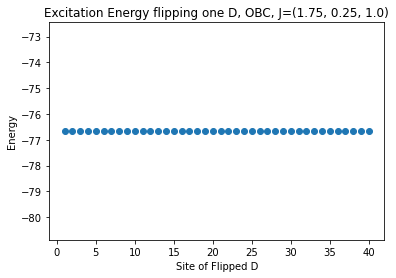

In [6]:
D_list = [1 for i in range(2*N)]

E_list = []

for i in range(2*N):
    D_list_1 = D_list.copy()
    D_list_1[i] *= -1
    E = (np.sum(get_Majorana_spectrum(Jx, Jy, Jz, N, SigmaY, D_list_1, bc, method='M2')))
    E_list.append(E)
    
plt.plot(np.arange(1, 2*N+1), E_list, 'o')
plt.title(f'Excitation Energy flipping one D, OBC, J=({Jx}, {Jy}, {Jz})')
plt.xlabel('Site of Flipped D')
plt.ylabel('Energy')

## $\Sigma^y = -1$

Text(0, 0.5, 'Energy')

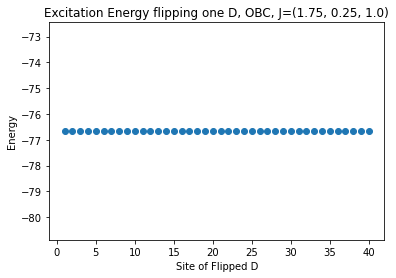

In [9]:
SigmaY = -1

D_list = [1 for i in range(2*N)]

E_list = []

for i in range(2*N):
    D_list_1 = D_list.copy()
    D_list_1[i] *= -1
    E = (np.sum(get_Majorana_spectrum(Jx, Jy, Jz, N, SigmaY, D_list_1, bc, method='M2')))
    E_list.append(E)
    
plt.plot(np.arange(1, 2*N+1), E_list, 'o')
plt.title(f'Excitation Energy flipping one D, OBC, J=({Jx}, {Jy}, {Jz})')
plt.xlabel('Site of Flipped D')
plt.ylabel('Energy')

## Comparison between different SigmaY

In [10]:
SigmaY = 1
spec1 = get_Majorana_spectrum(Jx, Jy, Jz, N, SigmaY, D_list_1, bc, method='M2')

SigmaY = -1
spec2 = get_Majorana_spectrum(Jx, Jy, Jz, N, SigmaY, D_list_1, bc, method='M2')

In [11]:
spec1

array([-2.65401557, -2.50660712, -2.50654654, -2.50517103, -2.50475728,
       -2.50324543, -2.50267621, -2.50111917, -2.50046449, -2.49965696,
       -2.49320943, -2.48554856, -2.46995488, -2.45801251, -2.42980253,
       -2.41397193, -2.36959693, -2.35051157, -2.2870718 , -2.26537401,
       -2.18085734, -2.15709468, -2.05047709, -2.02508814, -1.89638259,
       -1.86971561, -1.72002639, -1.6923639 , -1.52400735, -1.49558973,
       -1.31239805, -1.28344905, -1.0915507 , -1.06231926, -0.87220515,
       -0.84308112, -0.67501626, -0.64704783, -0.53990982, -0.51852778])

In [12]:
spec2

array([-2.65401557, -2.50659589, -2.50653229, -2.50523075, -2.50484636,
       -2.50314624, -2.50262139, -2.50108892, -2.50040066, -2.49954293,
       -2.49415003, -2.48346709, -2.47364139, -2.45220804, -2.43825079,
       -2.40236932, -2.38482764, -2.3312307 , -2.31076372, -2.23697669,
       -2.21418508, -2.11868211, -2.09405769, -1.97632799, -1.95026117,
       -1.81085417, -1.78365729, -1.62426069, -1.5961923 , -1.41982299,
       -1.3911115 , -1.20260105, -1.17347534, -0.98073472, -0.95148946,
       -0.76888849, -0.74011485, -0.59645497, -0.57035397, -0.50898701])

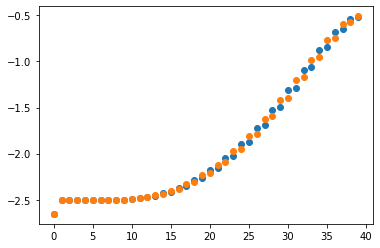

-76.66442178754338 -76.6644192555351


In [15]:
plt.plot(spec1, 'o')
plt.plot(spec2, 'o')

plt.show()

print(np.sum(spec1), np.sum(spec2))

### The Parity

In [21]:
SigmaY = -1

D_list = [1 for i in range(2*N)]

E_list = []

for i in range(2*N):
    D_list_1 = D_list.copy()
    D_list_1[i] *= -1
    H_skew = H_fermionic_skew(Jx, Jy, Jz, N, SigmaY, D_list_1, bc)
    t, Q = decompose_skew_schur(H_skew)
    print(f'Parity: {np.round(np.linalg.det(Q) * np.prod(D_list_1))}')
#     E = (np.sum(get_Majorana_spectrum(Jx, Jy, Jz, N, SigmaY, D_list_1, bc, method='M2')))
    E_list.append(E)

Parity: 1.0
Parity: 1.0
Parity: 1.0
Parity: 1.0
Parity: 1.0
Parity: 1.0
Parity: 1.0
Parity: 1.0
Parity: 1.0
Parity: 1.0
Parity: 1.0
Parity: 1.0
Parity: 1.0
Parity: 1.0
Parity: 1.0
Parity: 1.0
Parity: 1.0
Parity: 1.0
Parity: 1.0
Parity: 1.0
Parity: 1.0
Parity: 1.0
Parity: 1.0
Parity: 1.0
Parity: 1.0
Parity: 1.0
Parity: 1.0
Parity: 1.0
Parity: 1.0
Parity: 1.0
Parity: 1.0
Parity: 1.0
Parity: 1.0
Parity: 1.0
Parity: 1.0
Parity: 1.0
Parity: 1.0
Parity: 1.0
Parity: 1.0
Parity: 1.0


In [22]:
SigmaY = 1

D_list = [1 for i in range(2*N)]

E_list = []

for i in range(2*N):
    D_list_1 = D_list.copy()
    D_list_1[i] *= -1
    H_skew = H_fermionic_skew(Jx, Jy, Jz, N, SigmaY, D_list_1, bc)
    t, Q = decompose_skew_schur(H_skew)
    print(f'Parity: {np.round(np.linalg.det(Q) * np.prod(D_list_1))}')
#     E = (np.sum(get_Majorana_spectrum(Jx, Jy, Jz, N, SigmaY, D_list_1, bc, method='M2')))
    E_list.append(E)

Parity: -1.0
Parity: -1.0
Parity: -1.0
Parity: -1.0
Parity: -1.0
Parity: -1.0
Parity: -1.0
Parity: -1.0
Parity: -1.0
Parity: -1.0
Parity: -1.0
Parity: -1.0
Parity: -1.0
Parity: -1.0
Parity: -1.0
Parity: -1.0
Parity: -1.0
Parity: -1.0
Parity: -1.0
Parity: -1.0
Parity: -1.0
Parity: -1.0
Parity: -1.0
Parity: -1.0
Parity: -1.0
Parity: -1.0
Parity: -1.0
Parity: -1.0
Parity: -1.0
Parity: -1.0
Parity: -1.0
Parity: -1.0
Parity: -1.0
Parity: -1.0
Parity: -1.0
Parity: -1.0
Parity: -1.0
Parity: -1.0
Parity: -1.0
Parity: -1.0


Just as what we expected:
 - In the PBC Kitaev Ladder, flipping any one of the `D`'s
 - The change of the value of `SigmaY`, either plus one or minus one, will change the parity directly

In [8]:
E_gs = np.sum(get_Majorana_spectrum(Jx, Jy, Jz, N, SigmaY, D_list, bc, method='M2'))
print(f'The energy of the ground state: {E_gs}')
print(f'The energy of the 1st excited state with 1 vortex: {E_list[0]}')

The energy of the ground state: -76.69171675725474
The energy of the 1st excited state with 1 vortex: -76.66442178754338


# Two `D`'s flipped

Text(0, 0.5, 'Energy')

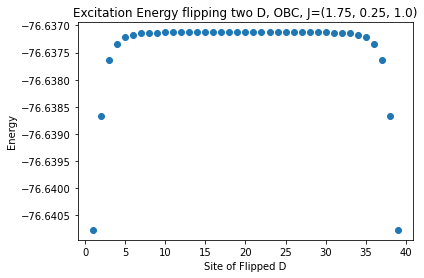

In [31]:
SigmaY = -1

D_list = [1 for i in range(2*N)]
    

E_list_2 = []

for i in range(1, 2*N):
    D_list_2 = D_list.copy()
    D_list_2[0] *= -1
    D_list_2[i] *= -1
#     if i == 2*N - 1:
#         D_list_2[0] *= -1
#     else:
#         D_list_2[i+1] *= -1
    E = (np.sum(get_Majorana_spectrum(Jx, Jy, Jz, N, SigmaY, D_list_2, bc, method='M2')))
    E_list_2.append(E)
    
plt.plot(np.arange(1, 2*N), E_list_2, 'o')
plt.title(f'Excitation Energy flipping two D, OBC, J=({Jx}, {Jy}, {Jz})')
plt.xlabel('Site of Flipped D')
plt.ylabel('Energy')

Text(0, 0.5, 'Energy')

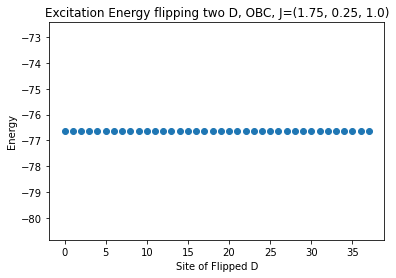

In [26]:
SigmaY = -1

D_list = [1 for i in range(2*N)]

E_list_3 = []

for i in range(2*N - 2):
    D_list_3 = D_list.copy()
    D_list_3[i] *= -1
    
    D_list_3[i+2] *= -1
    E = (np.sum(get_Majorana_spectrum(Jx, Jy, Jz, N, SigmaY, D_list_3, bc, method='M2')))
    E_list_3.append(E)
    
plt.plot(E_list_3, 'o')
plt.title(f'Excitation Energy flipping two D, OBC, J=({Jx}, {Jy}, {Jz})')
plt.xlabel('Site of Flipped D')
plt.ylabel('Energy')

In [28]:
print(E_list_2[0])
print(E_list_3[0])

-76.64076866476397
-76.6386694368138
